In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/nas.dbms/fathan/test/multilang-hate-models/binary-hatespeech/final_preprocessed_data_yidong_devansh.csv', header = 0, names=['text', 'hs_class'])
# Ensure 'text' column is string type
df['text'] = df['text'].astype(str)

# Convert the 'hs_class' column to numeric, forcing errors to NaN
df['hs_class'] = pd.to_numeric(df['hs_class'], errors='coerce')

# Display rows with non-numeric 'hs_class' values
print("Rows with non-numeric 'hs_class' values:")
print(len(df[df['hs_class'].isna()]))

# Drop rows with NaN 'hs_class' values
df.dropna(subset=['hs_class'], inplace=True)

# Convert 'hs_class' column to integer type
df['hs_class'] = df['hs_class'].astype(int)

# Map the 'hs_class' values: 1 -> 'positive', 0 -> 'negative'
df['hs_class'] = df['hs_class'].map({1: 'positive', 0: 'negative'})

df.dropna(subset=['text'], inplace=True)
df.info()
df.sample(5)

Rows with non-numeric 'hs_class' values:
7
<class 'pandas.core.frame.DataFrame'>
Index: 451701 entries, 0 to 451707
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   text      451701 non-null  object
 1   hs_class  451701 non-null  object
dtypes: object(2)
memory usage: 10.3+ MB


,text,hs_class
303227,awickert this article deformation mechanics ha...,negative
165372,hi i would be happy to adopt you check out my ...,negative
315362,oh i love you thank that i love this country a...,negative
29165,haiti is listed as the second worse place to t...,positive
256879,quote hi while i appreciate that you have legi...,negative


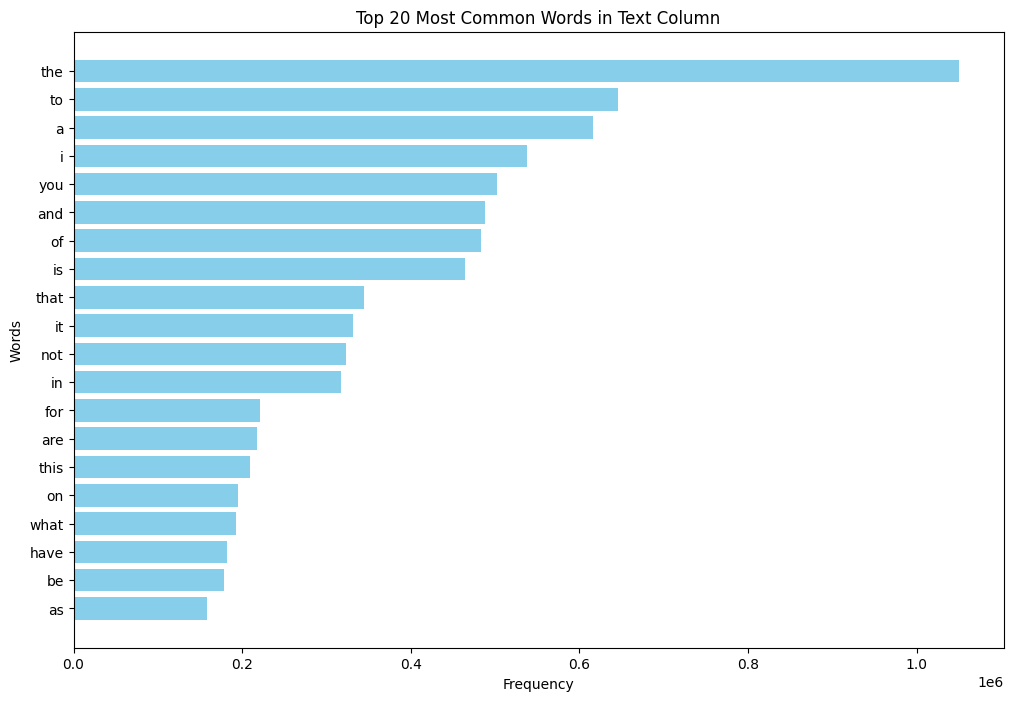

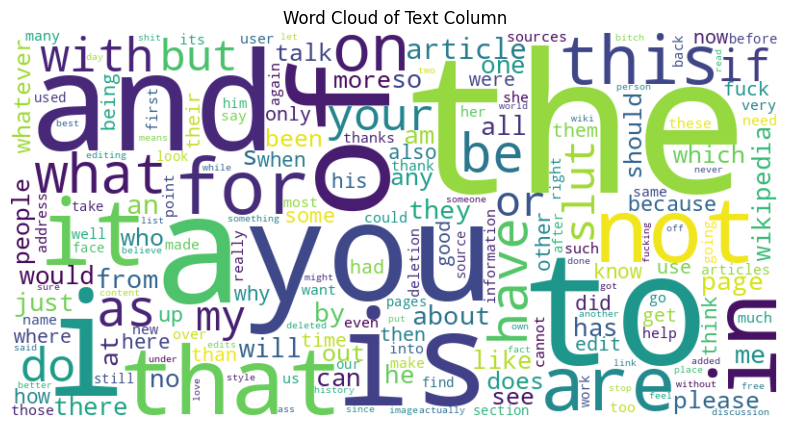

In [3]:
from collections import Counter
from wordcloud import WordCloud

# Combine all text into one large string
all_text = ' '.join(df['text'])

# Split into words and count occurrences
word_counts = Counter(all_text.split())

# Get the most common words
most_common_words = word_counts.most_common(20)

# Separate words and their frequencies for plotting
words, frequencies = zip(*most_common_words)

# Plot the most common words
plt.figure(figsize=(12, 8))
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words in Text Column')
plt.gca().invert_yaxis()
plt.show()

# Optional: Display word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Text Column')
plt.show()

In [4]:
from wordcloud import WordCloud , STOPWORDS
cloud1 = WordCloud(stopwords =STOPWORDS, background_color='white',min_word_length=2,random_state= 53).generate(str(df[df.hs_class=='negative']['text'].values))
cloud2 = WordCloud(stopwords =STOPWORDS, background_color='white',min_word_length=2,random_state= 53).generate(str(df[df.hs_class=='positive']['text'].values))

In [5]:
cloud1.words_
for key in cloud1.words_.keys():
    if cloud2.words_.get(key,False):
        if cloud2.words_.get(key,None)> 0.4 and cloud1.words_.get(key,None) > 0.4:
            print(f'{key:10} {round(cloud1.words_[key],2):10}{round(cloud2.words_[key],2):10}')

Text(0.5, 1.0, 'positive')

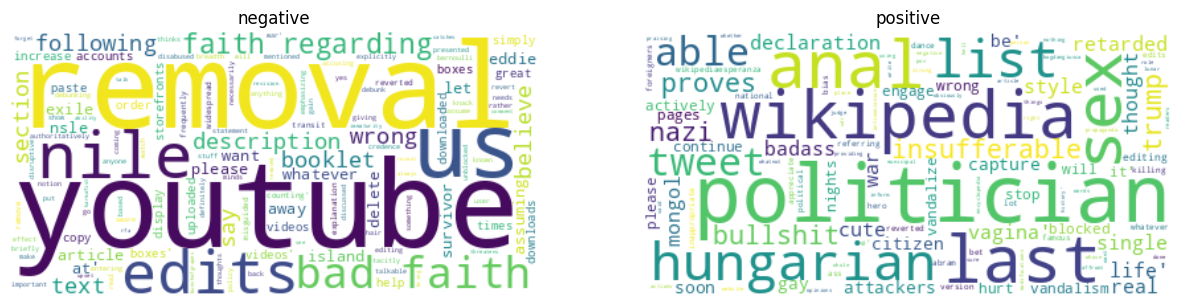

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.imshow(cloud1, interpolation = 'bilinear')
ax1.axis('off')
ax1.set_title("negative")

ax2.imshow(cloud2, interpolation = 'bilinear')
ax2.axis('off')
ax2.set_title("positive")

hs_class
negative    371452
positive     80249
Name: count, dtype: int64


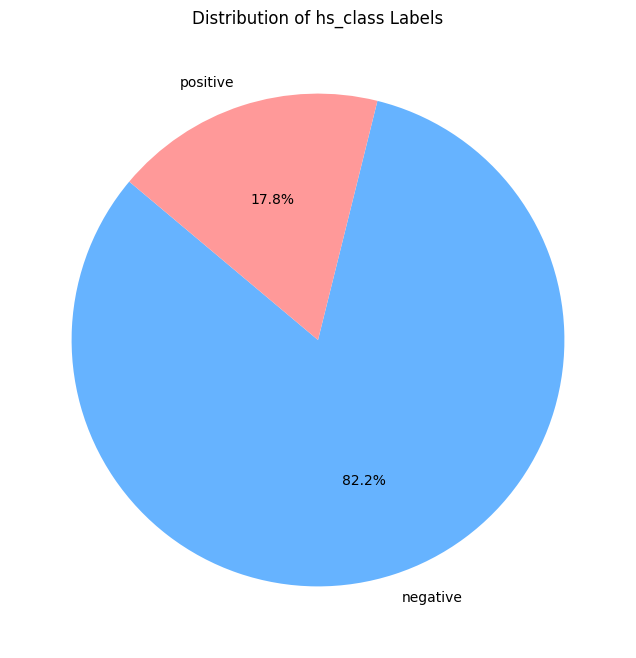

In [7]:
# Generate pie chart for 'hs_class' labels
class_counts = df['hs_class'].value_counts()

print(class_counts)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999'])
plt.title('Distribution of hs_class Labels')
plt.show()

In [8]:
# Import necessary libraries
import pandas as pd
from imblearn.under_sampling import RandomUnderSampler

# # Assuming you have your dataframe ready, load it if needed
# # df = pd.read_csv('your_dataset.csv')

# # Sample data (you should use your actual dataframe)
# data = {
#     'text': ["text1", "text2", "text3", "text4", "text5", "text6", "text7", "text8"],
#     'hs_class': ["negative", "negative", "positive", "negative", "positive", "negative", "positive", "negative"]
# }

# df = pd.DataFrame(data)

# Display the original class distribution
print(df['hs_class'].value_counts())

# Create the undersampling object
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Separate the features (X) and the target (y)
X = df['text'].values.reshape(-1, 1)  # Reshape required because RandomUnderSampler expects a 2D array
y = df['hs_class']

# Perform the undersampling
X_resampled, y_resampled = undersampler.fit_resample(X, y)

# Create a new dataframe with the resampled data
df_resampled = pd.DataFrame({'text': X_resampled.flatten(), 'hs_class': y_resampled})

# Display the new class distribution
print(df_resampled['hs_class'].value_counts())

# Display the first few rows of the resampled dataframe
print(df_resampled.head())

hs_class
negative    371452
positive     80249
Name: count, dtype: int64
hs_class
negative    80249
positive    80249
Name: count, dtype: int64
                                                text  hs_class
0  this is not or at least should not be an artic...  negative
1  free translation this text says as follows leo...  negative
2  sure this has nothing to do with boris wanting...  negative
3  giving other editor s warnings hi there in the...  negative
4  should not pussy grabbing be the one wearing t...  negative


wikipedia         0.5      0.67


Text(0.5, 1.0, 'positive')

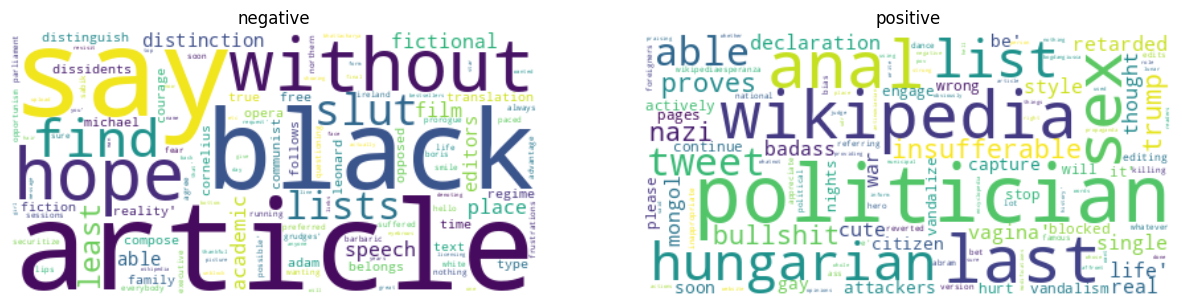

In [9]:
from wordcloud import WordCloud , STOPWORDS
cloud1 = WordCloud(stopwords =STOPWORDS, background_color='white',min_word_length=2,random_state= 53).generate(str(df_resampled[df_resampled.hs_class=='negative']['text'].values))
cloud2 = WordCloud(stopwords =STOPWORDS, background_color='white',min_word_length=2,random_state= 53).generate(str(df_resampled[df_resampled.hs_class=='positive']['text'].values))

cloud1.words_
for key in cloud1.words_.keys():
    if cloud2.words_.get(key,False):
        if cloud2.words_.get(key,None)> 0.4 and cloud1.words_.get(key,None) > 0.4:
            print(f'{key:10} {round(cloud1.words_[key],2):10}{round(cloud2.words_[key],2):10}')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))

ax1.imshow(cloud1, interpolation = 'bilinear')
ax1.axis('off')
ax1.set_title("negative")

ax2.imshow(cloud2, interpolation = 'bilinear')
ax2.axis('off')
ax2.set_title("positive")